In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
adf = pd.read_csv('LasVegasTripAdvisorReviews-Dataset.csv')

Exploring the data

In [3]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [4]:
adf.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,4.047619,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,0.844650,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,3.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,3.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000,13.000000


In [5]:
for (name, series) in adf.iteritems():
    print('Column:', name)
    print('\tNumber of records', series.size)
    print('\tNumber of missing values', series.isnull().sum())
    print('\tNumber of unique values', series.unique().size)


Column: User country
	Number of records 504
	Number of missing values 0
	Number of unique values 48
Column: Nr. reviews
	Number of records 504
	Number of missing values 0
	Number of unique values 139
Column: Nr. hotel reviews
	Number of records 504
	Number of missing values 0
	Number of unique values 64
Column: Helpful votes
	Number of records 504
	Number of missing values 0
	Number of unique values 109
Column: Score
	Number of records 504
	Number of missing values 0
	Number of unique values 5
Column: Period of stay
	Number of records 504
	Number of missing values 0
	Number of unique values 4
Column: Traveler type
	Number of records 504
	Number of missing values 0
	Number of unique values 5
Column: Pool
	Number of records 504
	Number of missing values 0
	Number of unique values 2
Column: Gym
	Number of records 504
	Number of missing values 0
	Number of unique values 2
Column: Tennis court
	Number of records 504
	Number of missing values 0
	Number of unique values 2
Column: Spa
	Number 

Finding Mode and 2nd mode of dataset 

In [6]:
for (name, series) in adf.iteritems():
    print(adf[name].value_counts())
    print("\n")

USA                     217
UK                       72
Canada                   65
Australia                36
Ireland                  13
India                    11
Mexico                    8
Germany                   7
Egypt                     5
Brazil                    5
New Zeland                5
Singapore                 4
Netherlands               4
Finland                   3
Malaysia                  3
Thailand                  3
Hawaii                    3
Israel                    3
Norway                    3
Switzerland               2
Costa Rica                2
Scotland                  2
Spain                     2
United Arab Emirates      2
Jordan                    1
Kenya                     1
China                     1
Croatia                   1
Swiss                     1
India                     1
Puerto Rico               1
Belgium                   1
Saudi Arabia              1
Syria                     1
Denmark                   1
Greece              

Creating plots of the data

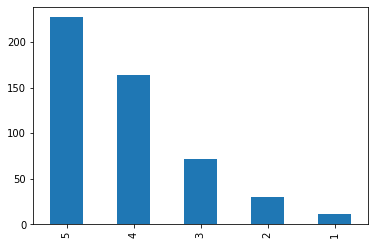

In [7]:
adf["Score"].value_counts().plot(kind="bar")

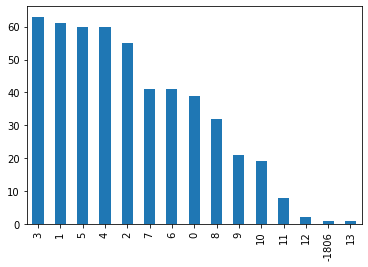

In [8]:
adf["Member years"].value_counts().plot(kind="bar")

Replacing missing value with mode

In [9]:
adf.replace(-1806,3,inplace=True)

Creating histograms for continuous data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001768B324588>,
      dtype=object)

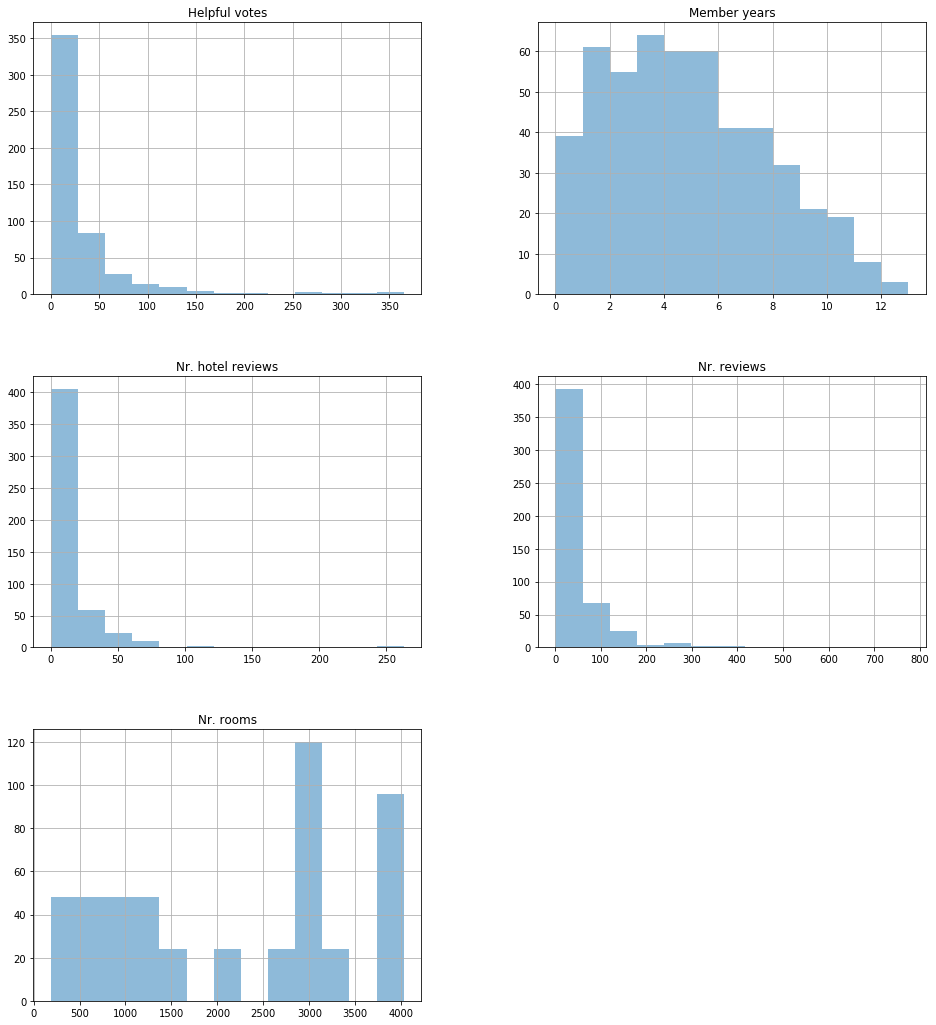

In [10]:
col_list = []
for (name, series) in adf.iteritems():
    if series.dtype != 'object' and name != 'Score' and name != 'Hotel stars':
        col_list.append(name)
adf_for_hist = adf[col_list]
adf_for_hist.hist(bins=13, alpha=0.5, figsize= (16,18))

Handling outliers for continuous data

In [11]:
col_list = []
for (name, series) in adf.iteritems():
    if series.dtype != 'object' and name != 'Score' and name != 'Hotel stars' and name != "Helpful votes" and name != "Nr. hotel reviews" and name != "Nr. reviews":
        col_list.append(name)
adf_out = adf[col_list]

Q1 = adf_out.quantile(0.25)
Q3 = adf_out.quantile(0.75)
IQR = Q3 - Q1

adf_NoOutliers = adf_out[~((adf_out < (Q1 - 1.5 * IQR)) |(adf_out > (Q3 + 1.5 * IQR))).any(axis=1)]
adf_NoOutliers.shape

cols = adf_NoOutliers.columns
adf[cols] = adf_NoOutliers
adf

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,9.0,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,3.0,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,2.0,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Europe,6.0,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,7.0,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826.0,Europe,1.0,October,Sunday
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826.0,North America,8.0,November,Thursday
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826.0,North America,4.0,November,Thursday
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826.0,North America,9.0,December,Wednesday


Performing min-max normalization

In [12]:
from sklearn import preprocessing
col_list = []
for (name, series) in adf_NoOutliers.iteritems():
    if series.dtype != 'object' and name != 'Score' and name != 'Hotel stars':
        col_list.append(name)
        
        
adf_minmax = adf_NoOutliers[col_list]

min_max_scaler=preprocessing.MinMaxScaler()
a_scaled=min_max_scaler.fit_transform(adf_minmax)

adf_scaled=pd.DataFrame(data=a_scaled, columns=adf_minmax.columns)

cols = adf_scaled.columns
adf[cols] = adf_scaled
adf

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,0.933837,North America,0.750000,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,0.933837,North America,0.250000,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,0.933837,North America,0.166667,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,0.933837,Europe,0.500000,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,0.933837,North America,0.583333,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,0.166189,Europe,0.666667,October,Sunday
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,0.166189,North America,0.333333,November,Thursday
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,0.166189,North America,0.750000,November,Thursday
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,0.166189,North America,0.416667,December,Wednesday


Changing YES and NO to 1 and 0. And similarly enumerating period of stay and traveler type. Extracting only relevant features (explanation on why these features were excluded explained in 'Feature Selection' I also changed Score to be High or Low.

In [13]:
adf.replace(('YES', 'NO'), (1, 0), inplace=True)
adf.replace(('Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb'), (0,1,2,3), inplace=True)
adf.replace(('Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb'), (0,1,2,3), inplace=True)
adf.replace(('Couples', 'Families', 'Friends', 'Business','Solo'), (0,1,2,3,4), inplace=True)
adf['Score'].replace((5,4,3,2,1),("High","High","Low","Low","Low"),inplace=True)

adf = adf[['Score','Period of stay','Traveler type','Pool','Gym','Tennis court','Spa','Casino','Free internet','Hotel stars','Nr. rooms']]
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Score           504 non-null    object 
 1   Period of stay  504 non-null    int64  
 2   Traveler type   504 non-null    int64  
 3   Pool            504 non-null    int64  
 4   Gym             504 non-null    int64  
 5   Tennis court    504 non-null    int64  
 6   Spa             504 non-null    int64  
 7   Casino          504 non-null    int64  
 8   Free internet   504 non-null    int64  
 9   Hotel stars     504 non-null    int64  
 10  Nr. rooms       503 non-null    float64
dtypes: float64(1), int64(9), object(1)
memory usage: 43.4+ KB


In [15]:
adf.to_csv('Processed.csv')